
# **<center> Kings County House Pricing Data</center>**

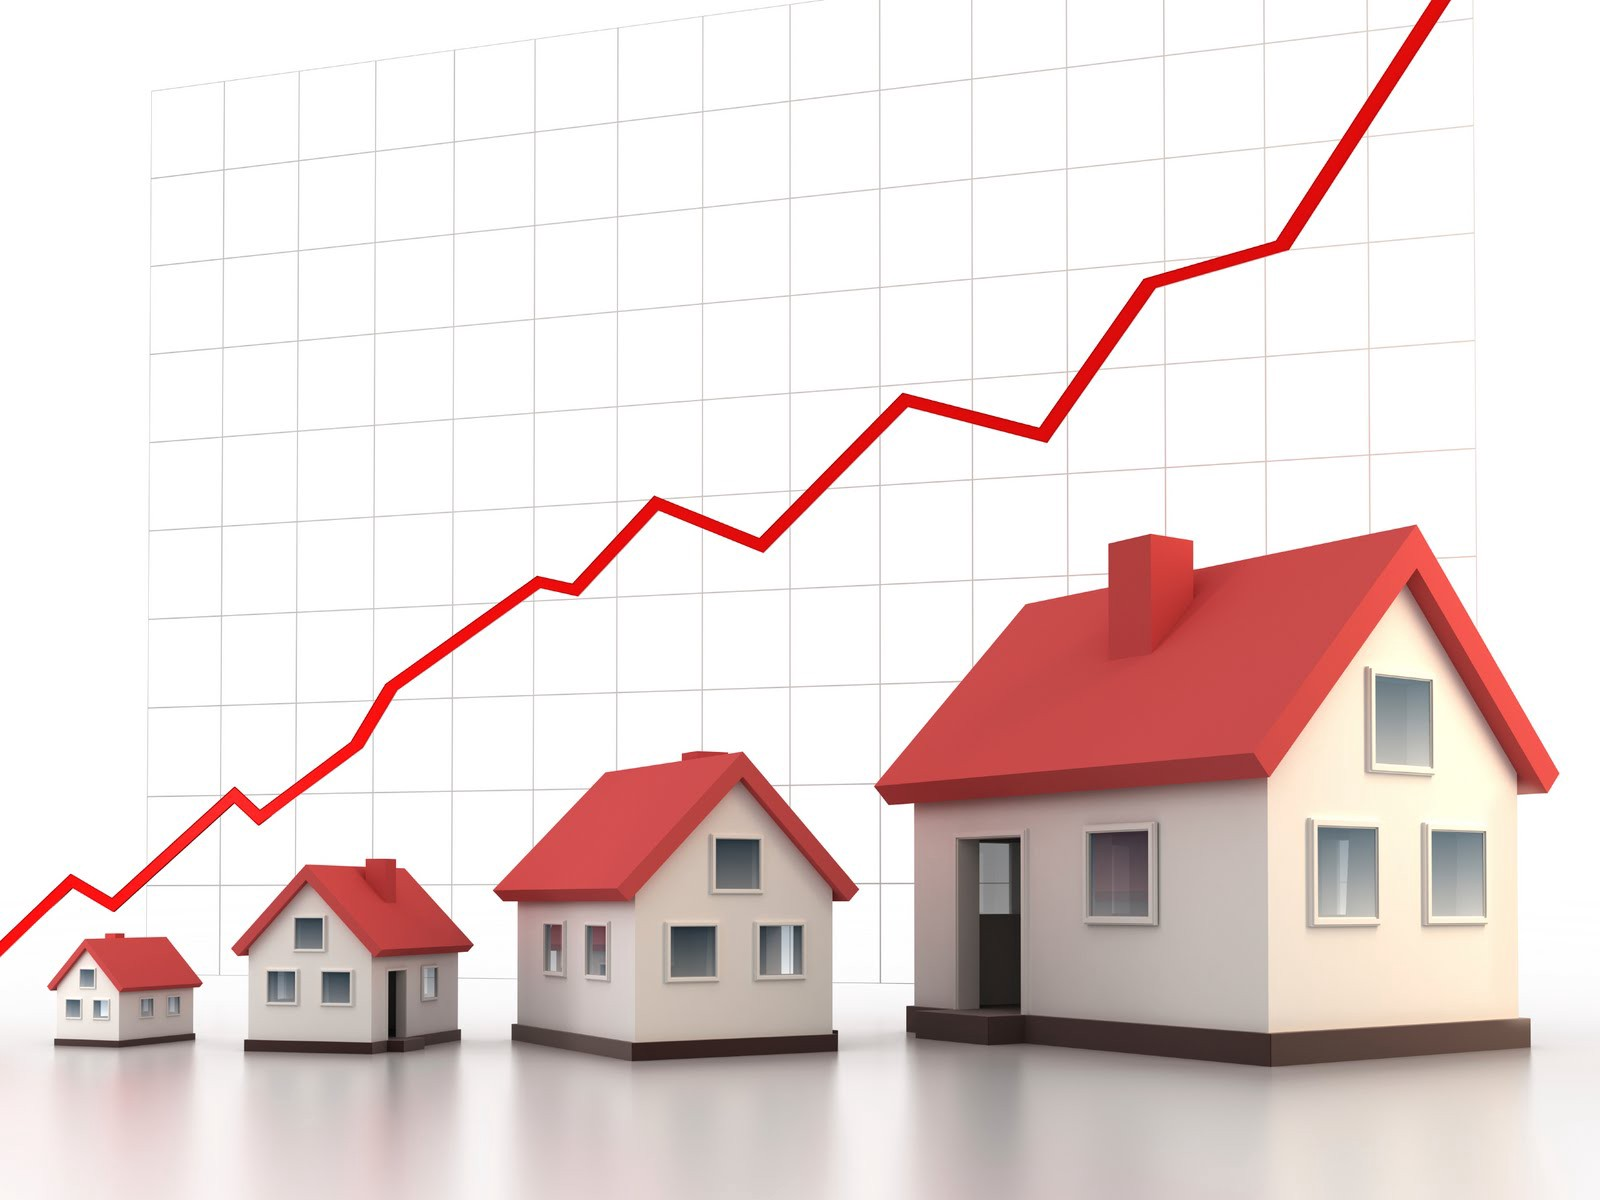]


# **<center> Table of Contents</center>**
- ## 1. [Introduction](#Introduction)
   - ### 1.1 [Abstract](#abstract)
- ## 2. [Importing Libraries](#importing_libraries)
- ## 3. [Dataset Summary](#dataset_summary)
   - ### 3.1 [Dataset Summary](#dataset_summary)
   - ### 3.2 [Dataset Cleaning](#dataset_cleaning)
- ## 4 [Exploratory Data Analysis (EDA)](#eda)
    - ### 4.1 [Heatmap of Correlation](#heatmap)
    - ### 4.2 [Countplot & Barplot](#barplot)
    - ### 4.3 [Scatterplot](#scatterplot)
    - ### 4.4 [Distplot](#distplot)
    - ### 4.5 [Boxplot](#boxplot)
- ## 5. [Linear Regression](#LinearRegression)
    - ### 5.1 [Linear Model 1](#LinearModel1)
    - ### 5.2 [Linear Model 2](#LinearModel2)
    - ### 5.3 [Linear Model 3](#LinearModel3)
- ## 6. [Multicollinearity](#Multicollinearity)
- ## 6. [Cross Validation](#CrossValidation)
- ## 7. [Stepwise Regression](#StepwiseRegression)
- ## 8. [Interaction Effect](#InteractionEffect)
- ## 9. [Regularization](#Regularization)
- ## 10. [Conclusion](#Conclusion)
- ## 11. [Contribution](#Contribution)
- ## 12. [Citation](#Citation)
- ## 13. [License](#License)

# **<center> Introduction </center> <a id=Introduction></a>**

## Executive Summary
Online property companies offer valuations of houses using machine learning techniques. The aim of this report is to predict the house sales in King County, Washington State, USA using Multiple Linear Regression (MLR). The dataset consisted of historic data of houses sold between May 2014 to May 2015.

# Abstract 

## Problem Statement
     “Predict the sales of houses in King County with an accuracy of at least 75-80% and understand which factors are responsible for higher property value - $650K and above.”

## Database Description

The dataset consists of house prices from King County an area in the US State of Washington, this data also covers Seattle. The dataset was obtained from Kaggle. This data was published/released under CC0: Public Domain. 
 The dataset consisted of 21 variables and 21613 observations.
Due to the “Grade” variable which is based on a grading system specific to King County, it seems likely that the data originated from an official source. On the other hand, the existence of the “View” variable relates to the number of viewings the property received. This suggests that the data originated from a real estate agent/company.
In either case, there is no reason to call into question the general accuracy of the data because values such as prices, area etc. do not appear random. Nevertheless, some caution is appropriate before applying models trained on this data to more general cases.

# **<center> Importing Libraries </center> <a id='importing_libraries'></a>**

In this step we import a few libraries that are required in our program. Some major libraries that are used are Numpy, Pandas, MatplotLib, Seaborn and sklearn.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#basic eda packages
from matplotlib import pyplot as plt
import seaborn as sns
from collections import Counter
import scipy.stats  as stats
from statistics import mean 

#models 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#validation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import classification_report

import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics import tsaplots


import warnings; warnings.simplefilter('ignore')

import os

Upload dataset to Github & link it below

In [2]:
# df=pd.read_csv('gdrive/My Drive/kc_house_data(21000).csv')
df= pd.read_csv('https://raw.githubusercontent.com/RushabhNisher/Data/master/Data%20Science/INFO_7390/Datasets/kc_house_data(21000).csv')

# **<center> Dataset Summary </center> <a id=dataset_summary></a>**

Here we are looking at the top 5 rows of the dataset to view, what type of dataset it is. We also look at the columns which show the various attributes in the dataset.

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Statistical Analysis

Here we are running basic Statistical analysis on the given data to find any abnormal values in the dataset

In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null int64
view             21597 non-null int64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


#   Dataset Cleaning  <a id='dataset_cleaning'></a>
Next we will check if there are any missing or Null values in the dataset.

In [6]:
print("Are there Null Values in the dataset? ")
df.isnull().values.any()

Are there Null Values in the dataset? 


False

# **<center> Exploratory Data Analysis (EDA) </center> <a id=eda></a>**

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

It is a good practice to understand the data first and try to gather as many insights from it. EDA is all about making sense of data in hand,before getting them dirty with it.

In [7]:
print("Shape of the data :",df.shape)

Shape of the data : (21597, 21)


We will drop the column "id" and "date" as since they're irrelavant for further analysis.

In [8]:
df.drop(["id","date"],axis=1,inplace=True)

# Correlation with respect to price

In the first step of our EDA we are finding out the correlation among the various attributes of the dataset. Correlation value gives us the measure of linear relationship amongst two numerical quantities. The range of correlation is between -1 and 1.

When two variables have a positive correlation, it means the variables move in the same direction. This means that as one variable increases, so does the other one. In a negative correlation, the variables move in inverse, or opposite, directions. In other words, as one variable increases, the other variable decreases. When the correlation value is 0, no correlation exists between the attributes

In [9]:
pd.DataFrame(df.corr()['price']).sort_values(by='price',ascending=False)

,price
price,1.000000
sqft_living,0.701917
grade,0.667951
sqft_above,0.605368
sqft_living15,0.585241
bathrooms,0.525906
view,0.397370
sqft_basement,0.323799
bedrooms,0.308787
lat,0.306692


Draw lower triangle for correlation map

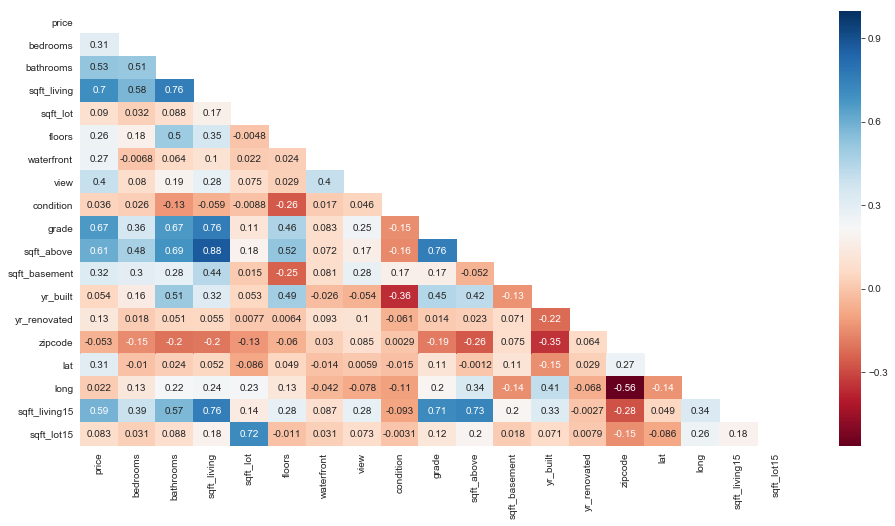

In [10]:
corr = df.corr()
plt.figure(figsize=(16,8))
mask = np.zeros_like(corr,dtype=np.bool)

# Create a msk to draw only lower diagonal corr map
mask[np.triu_indices_from(mask)] = True
sns.set_style(style="white")
sns.heatmap(corr,annot=True,cmap="RdBu",mask=mask)

Highlight only those values which are highly correlated (.5 and above)

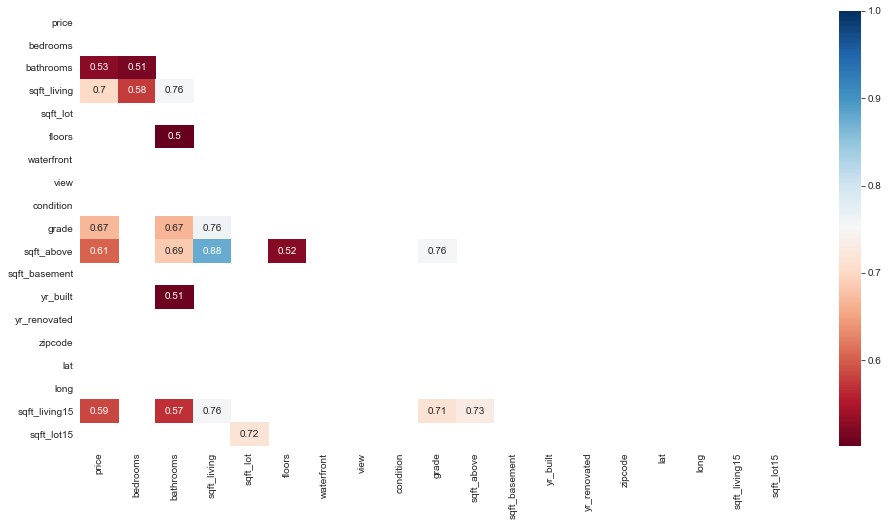

In [11]:
# corr[corr>=.5]
plt.figure(figsize=(16,8))
mask = np.zeros_like(corr[corr>=.5],dtype=np.bool)

# Create a msk to draw only lower diagonal corr map
mask[np.triu_indices_from(mask)] = True
sns.set_style(style="white")
sns.heatmap(corr[corr>=.5],annot=True,cmap="RdBu",mask=mask)

# Lets plot the data to get some insights


## Countplot & Barplot
### Countplot

A countplot method is used to Show the counts of observations in each categorical bin using bars.

### Barplots

A barplot is basically used to aggregate the categorical data according to some methods and by default it’s the mean. It can also be understood as a visualization of the group by action. To use this plot we choose a categorical column for the x-axis and a numerical column for the y-axis, and we see that it creates a plot taking a mean per categorical column.

Counter({3: 9824, 4: 6882, 2: 2760, 5: 1601, 6: 272, 1: 196, 7: 38, 8: 13, 9: 6, 10: 3, 11: 1, 33: 1})


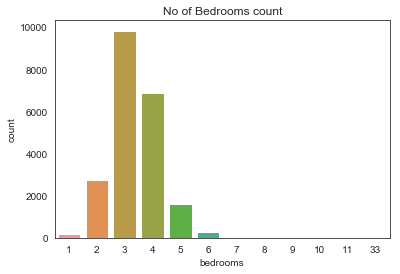

In [12]:
print(Counter(df.bedrooms))
sns.countplot(df.bedrooms);
plt.title("No of Bedrooms count");

Counter({2.5: 5377, 1.0: 3851, 1.75: 3048, 2.25: 2047, 2.0: 1930, 1.5: 1445, 2.75: 1185, 3.0: 753, 3.5: 731, 3.25: 589, 3.75: 155, 4.0: 136, 4.5: 100, 4.25: 79, 0.75: 71, 4.75: 23, 5.0: 21, 5.25: 13, 5.5: 10, 1.25: 9, 6.0: 6, 0.5: 4, 5.75: 4, 6.75: 2, 8.0: 2, 6.25: 2, 6.5: 2, 7.5: 1, 7.75: 1})


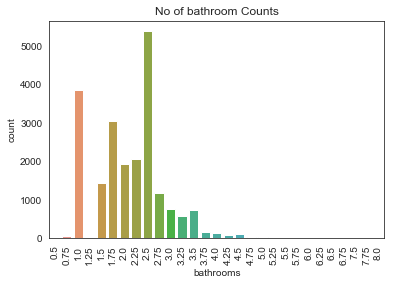

In [13]:
plt.xticks(rotation=90)
print(Counter(df.bathrooms))
sns.countplot(df.bathrooms);
plt.title('No of bathroom Counts');

Counter({1.0: 10673, 2.0: 8235, 1.5: 1910, 3.0: 611, 2.5: 161, 3.5: 7})


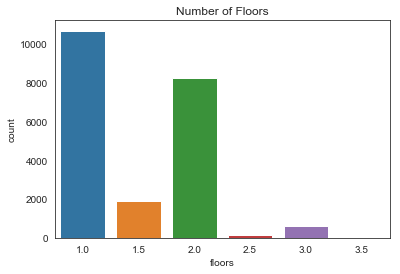

In [14]:
print(Counter(df.floors))
sns.countplot(df.floors);
plt.title("Number of Floors");

Counter({0: 19475, 2: 961, 3: 510, 1: 332, 4: 319})


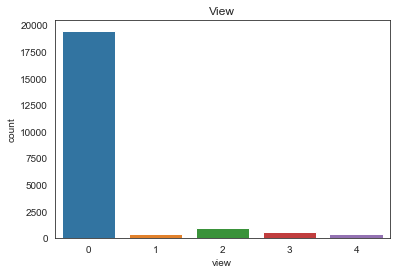

In [15]:
print(Counter(df.view))
sns.countplot(df.view)
plt.title("View");

Counter({7: 8974, 8: 6065, 9: 2615, 6: 2038, 10: 1134, 11: 399, 5: 242, 12: 89, 4: 27, 13: 13, 3: 1})


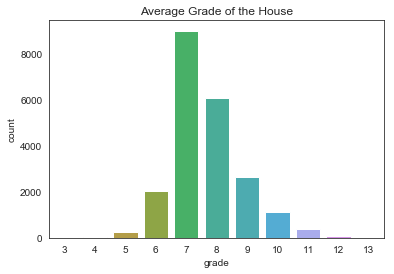

In [16]:
print(Counter(df.grade))
sns.countplot(df.grade)
plt.title("Average Grade of the House");

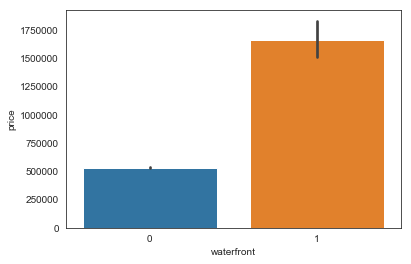

In [17]:
sns.barplot(df.waterfront,df.price)

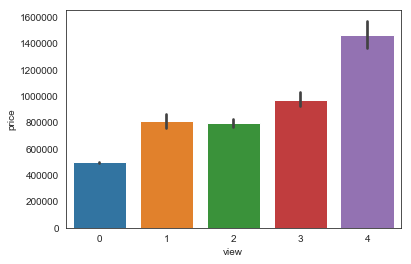

In [18]:
sns.barplot(df.view,df.price)

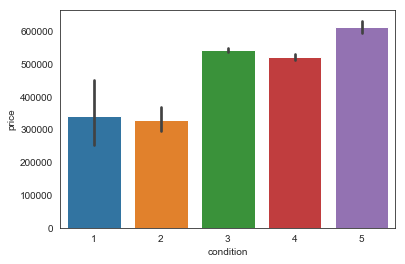

In [19]:
sns.barplot(df.condition,df.price)

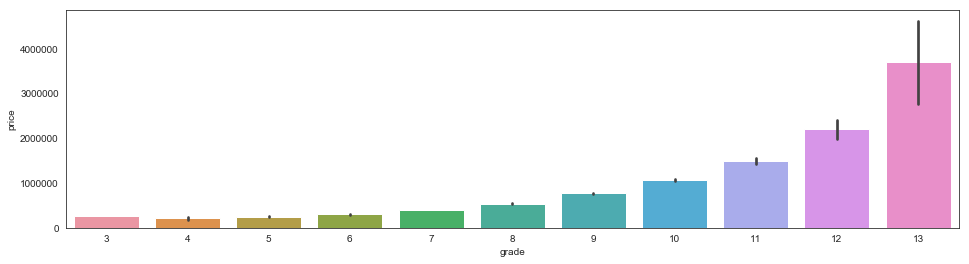

In [20]:
plt.figure(figsize=(16,4))
sns.barplot(df.grade,df.price)

## Pair Plot

While there are an almost overwhelming number of methods to use in EDA, one of the most effective starting tools is the pairs plot (also called a scatterplot matrix). A pairs plot allows us to see both distribution of single variables and relationships between two variables. Pair plots are a great method to identify trends for follow-up analysis.

The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables.


Text(0.5, 1.05, 'Pair Plot of Price, Bathrooms, Sqft_Living, Sqft_Above & Sqft_Living15')

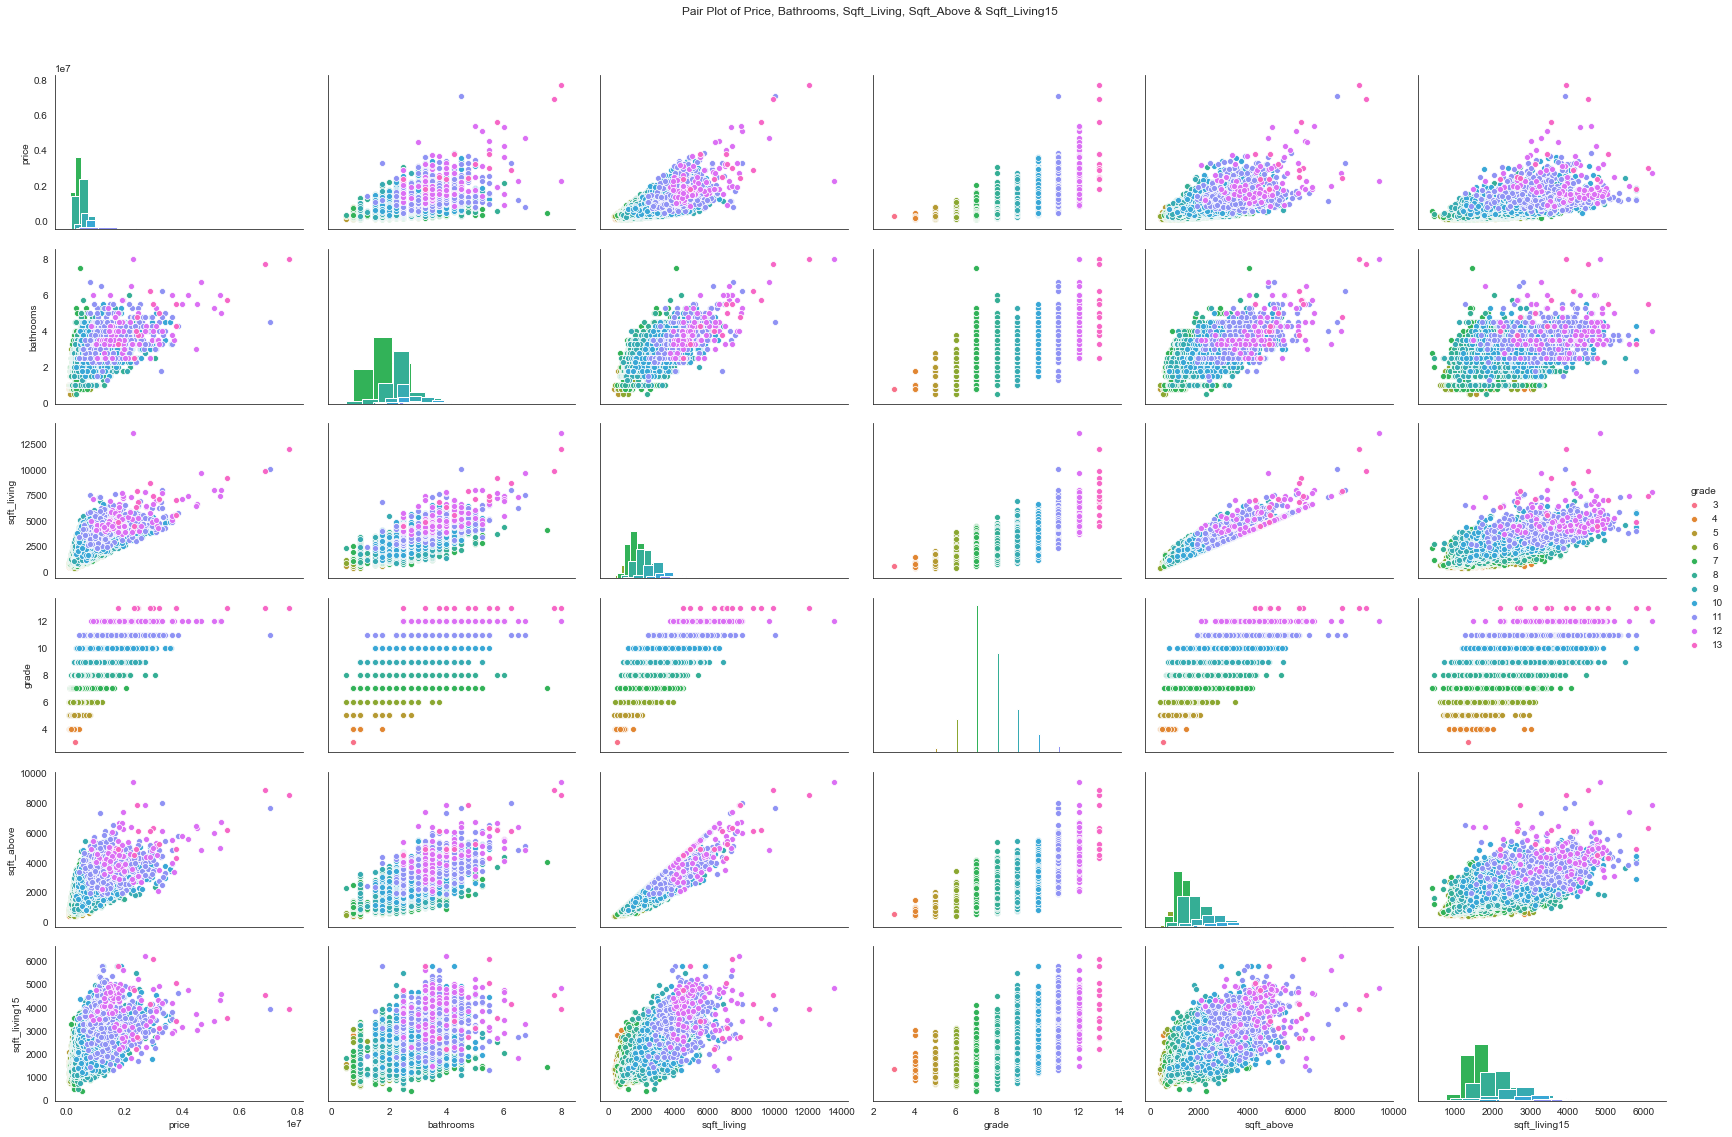

In [21]:
x = df[['price','bathrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15']]
pp=sns.pairplot(x, hue="grade", diag_kind="hist", aspect=1.55, markers="o")
pp.fig.suptitle('Pair Plot of Price, Bathrooms, Sqft_Living, Sqft_Above & Sqft_Living15',y=1.05)

We can see that there might be some multi collinearity & that our target variable, price is right skewed.

We need to convert our right skewed target variable into normal distribution.

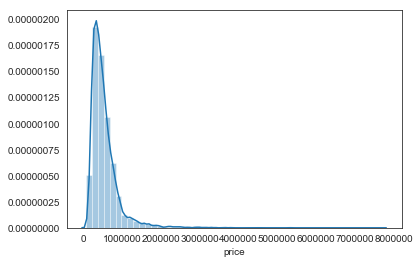

In [22]:
sns.distplot(df.price)

In [23]:
df['price'] = df['price'].apply(lambda x : np.log(x))

## Distplot

Seaborn distplot lets you show a histogram with a line on it. This can be shown in all kinds of variations. We use seaborn in combination with matplotlib, the Python plotting module.

A distplot plots a univariate distribution of observations.

columns name: price


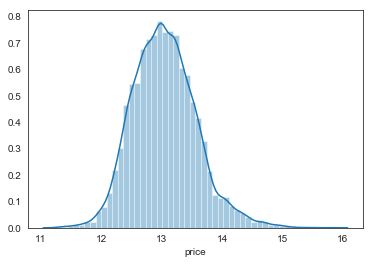

columns name: bedrooms


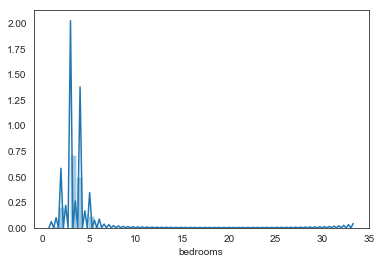

columns name: bathrooms


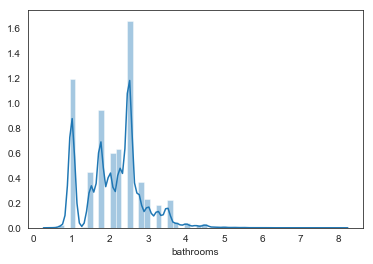

columns name: sqft_living


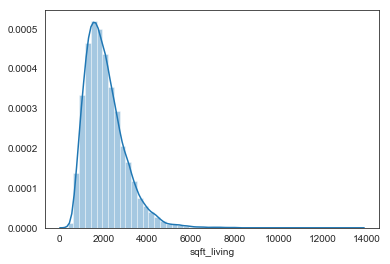

columns name: sqft_lot


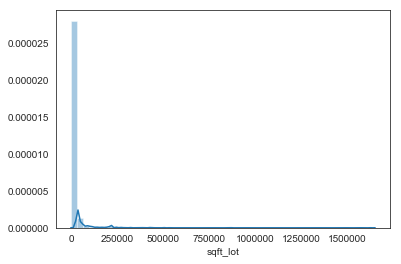

columns name: waterfront


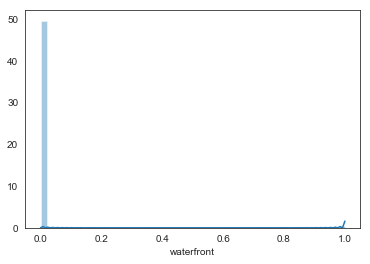

columns name: sqft_above


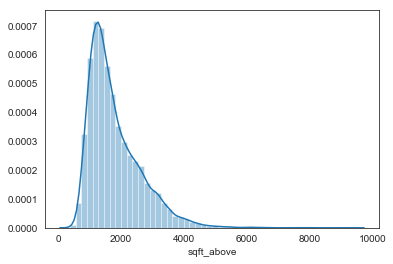

columns name: sqft_basement


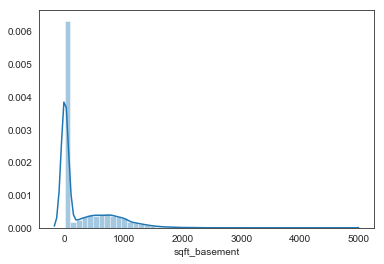

columns name: yr_built


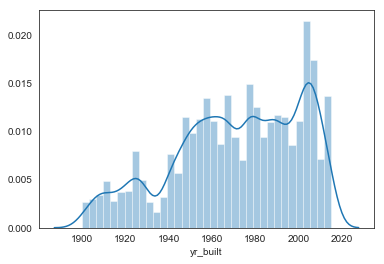

columns name: yr_renovated


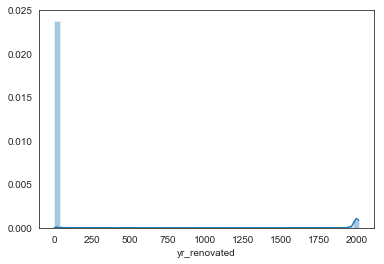

columns name: zipcode


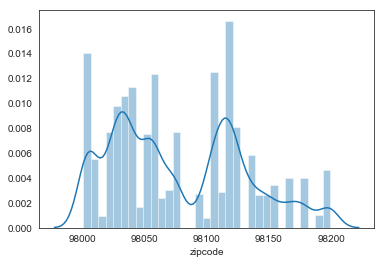

columns name: lat


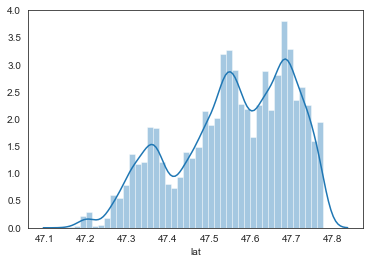

columns name: long


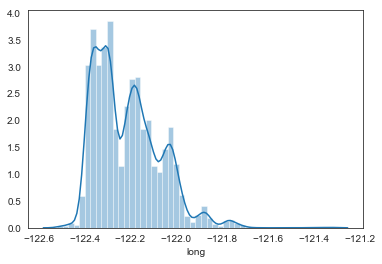

columns name: sqft_living15


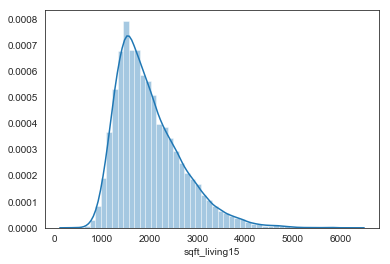

columns name: sqft_lot15


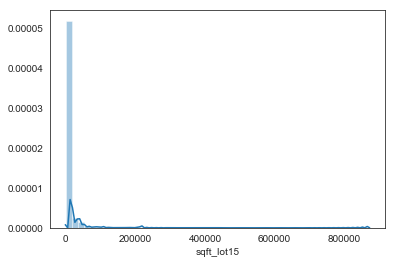

In [24]:
continous_columns=['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'waterfront','sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']
for i in continous_columns:
    print("columns name:",i)
    sns.distplot(df[i])
    plt.show()

## Boxplot

It is often used in explanatory data analysis in order to show the shape of the distribution, its central value, and its variability. The following figure gives us the boxplot for all the continous variables. 

column name: price


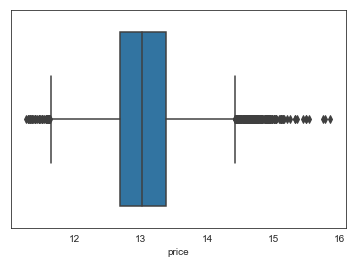

column name: bedrooms


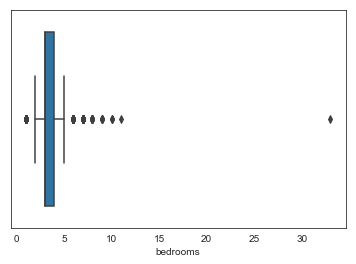

column name: bathrooms


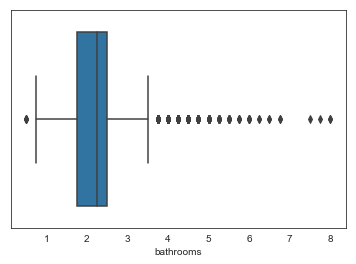

column name: sqft_living


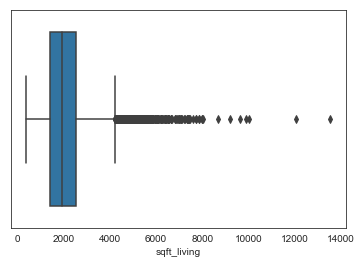

column name: sqft_lot


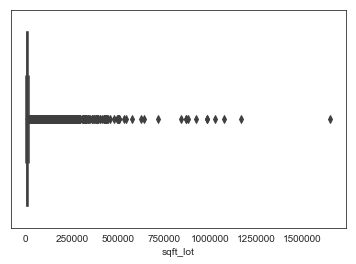

column name: waterfront


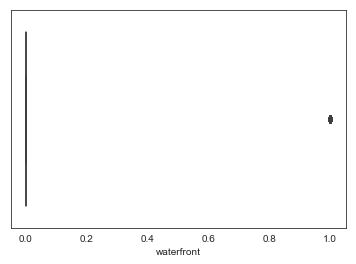

column name: sqft_above


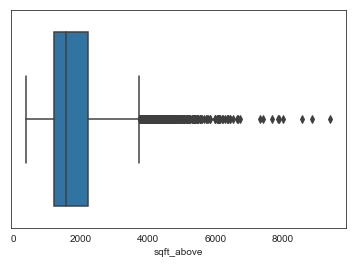

column name: sqft_basement


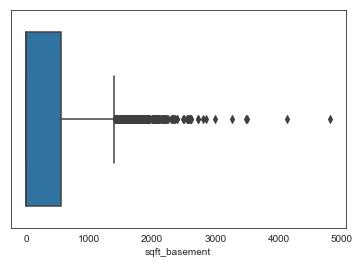

column name: yr_built


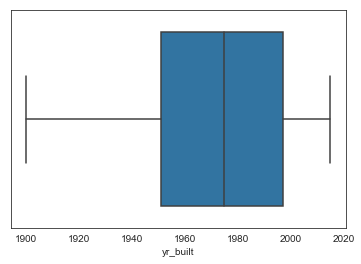

column name: yr_renovated


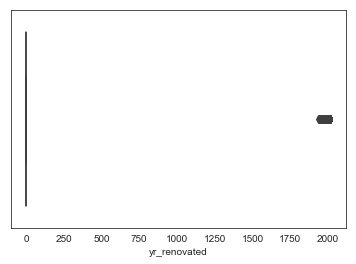

column name: zipcode


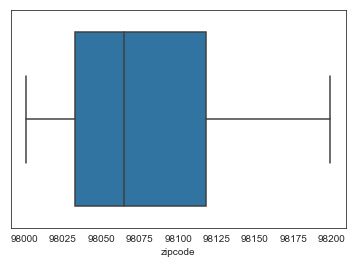

column name: lat


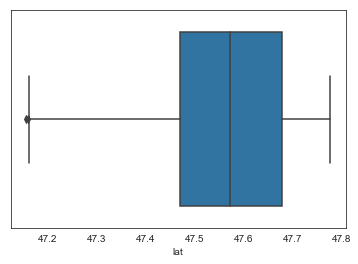

column name: long


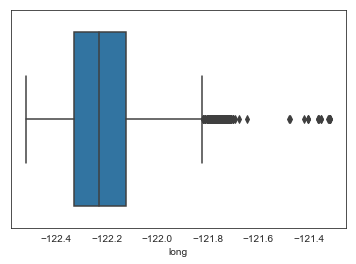

column name: sqft_living15


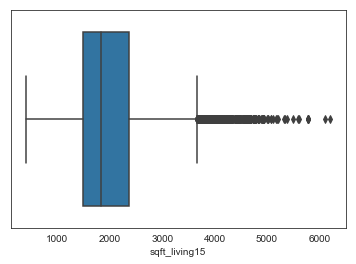

column name: sqft_lot15


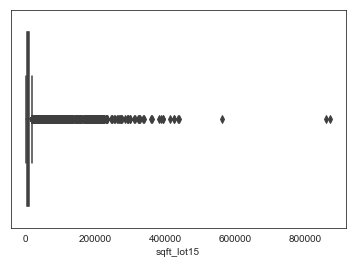

In [25]:
for i in continous_columns:
    print("column name:",i)
    sns.boxplot(df[i])
    plt.show()

In [26]:
#lets find out the house having more than 30 bedrooms
df[df.bedrooms >15]
#one thing to notice here is that this particular data has only 1.75 bathrooms 
#which is strange for such a large mansion. So this indeed is an outlier or have some error


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,13.369223,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [27]:
#let remove it
df = df[df.bedrooms <15]

Here we'll calculate the number of year's between present year and mentioned year in the data

In [28]:
df['built_age'] = 2020 - df.yr_built 
df.drop('yr_built',axis=1,inplace=True)

In [29]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,built_age
0,12.309982,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,0,98178,47.5112,-122.257,1340,5650,65
1,13.195614,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1991,98125,47.7210,-122.319,1690,7639,69
2,12.100712,2,1.00,770,10000,1.0,0,0,3,6,770,0,0,98028,47.7379,-122.233,2720,8062,87
3,13.311329,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,0,98136,47.5208,-122.393,1360,5000,55
4,13.142166,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,0,98074,47.6168,-122.045,1800,7503,33


Test for Autocorrelation

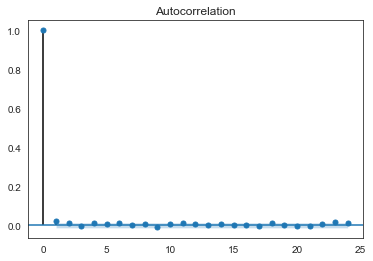

In [30]:
# Display the autocorrelation plot of your time series
fig = tsaplots.plot_acf(df['price'], lags=24)
plt.show()

# **<center> Linear Regression </center> <a id=LinearRegression></a>**

Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. One variable is considered to be an explanatory variable (Factors), and the other is considered to be a dependent variable (Overall). Linear regression looks at various data points and plots a trend line. Linear regression can create a predictive model on apparently random data, showing trends in data. Linear regression looks at various data points and plots a trend line. Linear regression can create a predictive model on apparently random data, showing trends in data.

### **Simple Linear Regression**

The case of single explanatory variable (independent variable) is called single linear regression.¶

###  **Multiple Linear Regression**

The case of multiple explanatory variable (independent variable) is called multiple linear regression.
To build a well-performing machine learning (ML) model, it is important to seperate data into training and testing dataset . Basically we are training the model on and testing it against the data that comes from the same set of target distribution.

### **Mean Squared Error**

The Mean Squared Error (MSE) is a measure of how close a fitted line is to data points. It is the sum, over all the data points, of the square of the difference between the predicted and actual target variables, divided by the number of data points. RMSE is the square root of MSE.

### **Root Mean Squared Error**

Root Mean Square Error (RMSE) mathematically is the standard deviation of the residuals. Residuals is the measure of how far the data points are spreaded across the line of regression which we get by our training data set. RMSE is the measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit.

### **Akaike information criterion (AIC)**

The Akaike information criterion (AIC) is an estimator of the relative quality of statistical models for a given set of data. Given a collection of models for the data, AIC estimates the quality of each model, relative to each of the other models. Thus, AIC provides a means for model selection. When a statistical model is used to represent the process that generated the data, the representation will almost never be exact; so some information will be lost by using the model to represent the process. AIC estimates the relative amount of information lost by a given model: the less information a model loses, the higher the quality of that model.

In estimating the amount of information lost by a model, AIC deals with the trade-off between the goodness of fit of the model and the simplicity of the model. In other words, AIC deals with both the risk of overfitting and the risk of underfitting.

*𝐴𝐼𝐶=2𝑘+𝑛×𝑙𝑜𝑔(𝑅𝑆𝑆/N)*
 
where k=number of parameters, RSS=Residual Sum of Squares and n= number of rows

### **Bayesian information criterion (BIC)**

It is a criterion for model selection among a finite set of models; the model with the lowest BIC is preferred. It is based, in part, on the likelihood function and it is closely related to the Akaike information criterion (AIC).

When fitting models, it is possible to increase the likelihood by adding parameters, but doing so may result in overfitting. Both BIC and AIC attempt to resolve this problem by introducing a penalty term for the number of parameters in the model; the penalty term is larger in BIC than in AIC.

*𝐵𝐼𝐶=𝑛⋅ln(𝑅𝑆𝑆/𝑛)+𝑘⋅ln(𝑛)*
 
where k=number of parameters, RSS=Residual Sum of Squares and n= number of rows

Lower the value of AIC and BIC means better model since both measure the loss of data while modeling data, and low value denotes less data is lost overall.

### **P-value**

In statistics, the p-value is a function of the observed sample results (a statistic) that is used for testing a statistical hypothesis. Before the test is performed, a threshold value is chosen, called the significance level of the test, traditionally 5% or 1% and denoted as  𝛼 .

If the p-value is equal to or smaller than the significance level ( 𝛼 ), it suggests that the observed data are inconsistent with the assumption that the null hypothesis is true and thus that hypothesis must be rejected (but this does not automatically mean the alternative hypothesis can be accepted as true). When the p-value is calculated correctly, such a test is guaranteed to control the Type I error rate to be no greater than  𝛼 .

# Preprocessing
We start machine learning by setting the features and target:

Features: x

Target: y
Then, we split them to train and test sets

In [31]:
def linear_regression(X,y):
#SPLIT TEST AND TRAIN
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

#Linear Regression
    LR = LinearRegression()
    LR.fit(X_train, y_train)
    predictions = LR.predict(X_test)

    print(X_test.shape,X_train.shape,y_test.shape,y_train.shape)

    regressor_OLS = sm.OLS(y_train, X_train).fit()
    
    plt.figure(figsize=(18,10))
    plt.scatter(predictions,y_test,alpha = 0.3)
    plt.xlabel('Predictions')
    plt.ylabel('Price')
    plt.title("Linear Prediction ")
    plt.show()

#cross validation    
    Kfold = KFold(len(X), shuffle=True)
    #X_train = sc.fit_transform(X_train)
    #X_test = sc.transform(X_test)
    print("KfoldCrossVal mean score using Linear regression is %s" %cross_val_score(LR,X_train,y_train,cv=10).mean())
    z=print(regressor_OLS.summary())
    return z


In [32]:
####function to calculate cross validation score only
def cross_val(X,y):
    #SPLIT TEST AND TRAIN
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

#Linear Regression
    LR = LinearRegression()
    LR.fit(X_train, y_train)
    predictions = LR.predict(X_test)
    Kfold = KFold(len(X), shuffle=True)
    print("KfoldCrossVal mean score using Linear regression is %s" %cross_val_score(LR,X_train,y_train,cv=10).mean())

## Linear Regression 1


In [33]:
X_1 = df[['sqft_living','grade','sqft_above','sqft_living15','bathrooms','view','sqft_basement','bedrooms','lat','waterfront','floors','yr_renovated','sqft_lot','sqft_lot15','built_age','condition','long','zipcode']] # independent variables
y_1 = df.price.values # dependent variable

(4320, 18) (17276, 18) (4320,) (17276,)


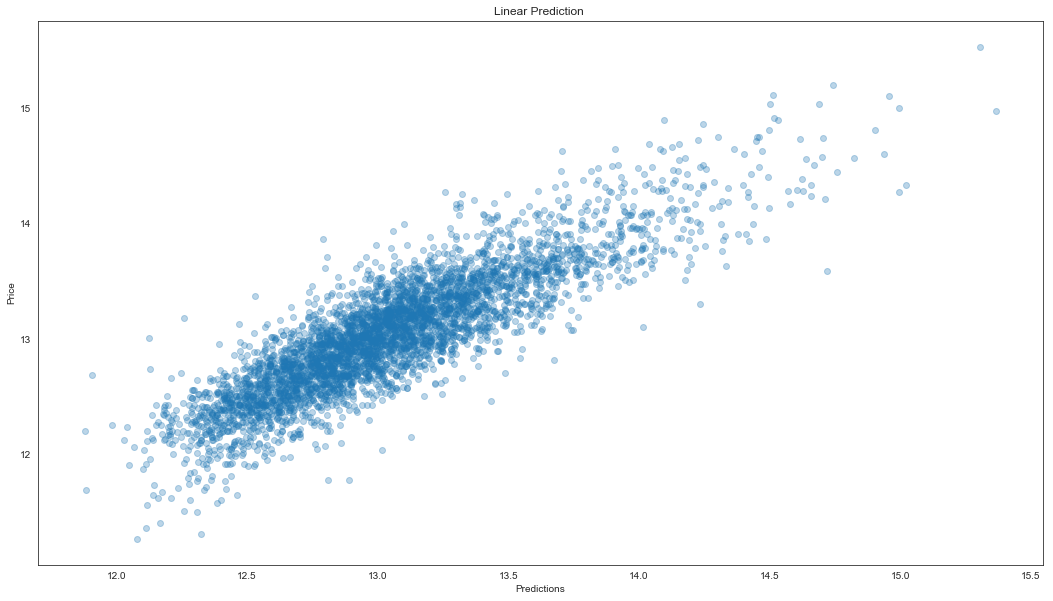

KfoldCrossVal mean score using Linear regression is 0.77195990257347
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.749e+06
Date:                Sat, 26 Sep 2020   Prob (F-statistic):               0.00
Time:                        18:47:23   Log-Likelihood:                -630.04
No. Observations:               17276   AIC:                             1294.
Df Residuals:                   17259   BIC:                             1426.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

In [34]:
linear_regression(X_1,y_1)

## Linear Regression 2

In [35]:
X_2 = df[['sqft_living','grade','sqft_above','sqft_living15','bathrooms']] # independent variables
y_2 = df.price.values # dependent variable

(4320, 5) (17276, 5) (4320,) (17276,)


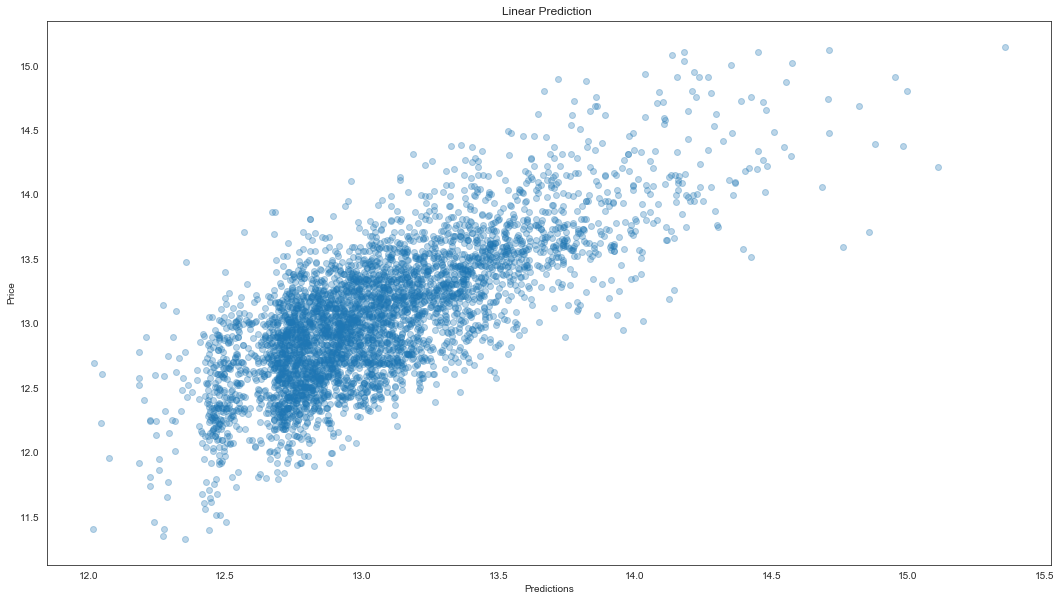

KfoldCrossVal mean score using Linear regression is 0.5689662122994756
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 2.867e+05
Date:                Sat, 26 Sep 2020   Prob (F-statistic):               0.00
Time:                        18:47:24   Log-Likelihood:                -30629.
No. Observations:               17276   AIC:                         6.127e+04
Df Residuals:                   17271   BIC:                         6.131e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

In [36]:
linear_regression(X_2,y_2)

# **<center> Multicollinearity </center> <a id=Multicollinearity></a>**

In statistics, multicollinearity (also collinearity) is a phenomenon in which one predictor variable in a multiple regression model can be linearly predicted from the others with a substantial degree of accuracy.

### Why Multicollinearity is a problem?

Multicollinearity occurs when independent variables in a regression model are correlated. This correlation is a problem because independent variables should be independent. If the degree of correlation between variables is high enough, it can cause problems when you fit the model and interpret the results.

VIF assesses whether factors are correlated to each other (multicollinearity) High variance inflation factor means that they "have" the same variance within this dataset. We would need to discard one of these variables before moving on to model building or risk building a model with high multicolinearity. If the VIF is equal to 1 there is no multicollinearity among factors, but if the VIF is greater than 1, the predictors may be moderately correlated. If the VIF for a factor is near or above 5 we may have to remove highly correlated factors.

In [37]:
## high variance inflation factor because they "explain" the same variance within this dataset. We would need to discard one of these variables before 
#moving on to model building or risk building a model with high multicolinearity.
def variance_IF(X):
    vif=vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["features"] = X.columns
    return vif

### VIF of Linear Model 1 Independant Variables

In [38]:
variance_IF(X_1)

,VIF Factor,features
0,inf,sqft_living
1,1.489138e+02,grade
2,inf,sqft_above
3,2.711998e+01,sqft_living15
4,2.894460e+01,bathrooms
5,1.551198e+00,view
6,inf,sqft_basement
7,2.540354e+01,bedrooms
8,1.390036e+05,lat
9,1.213291e+00,waterfront


### VIF of Linear Model 2 Independant Variables

In [39]:
variance_IF(X_2)

,VIF Factor,features
0,36.060715,sqft_living
1,23.883262,grade
2,25.861552,sqft_above
3,25.164633,sqft_living15
4,21.065730,bathrooms


Based on the results, lets try a regression model with only low VIFs

## Linear Regression 3

In [40]:
X_3 = df[['view','waterfront','yr_renovated','sqft_lot','sqft_lot15','built_age']] # independent variables
y_3 = df.price.values # dependent variable

(4320, 6) (17276, 6) (4320,) (17276,)


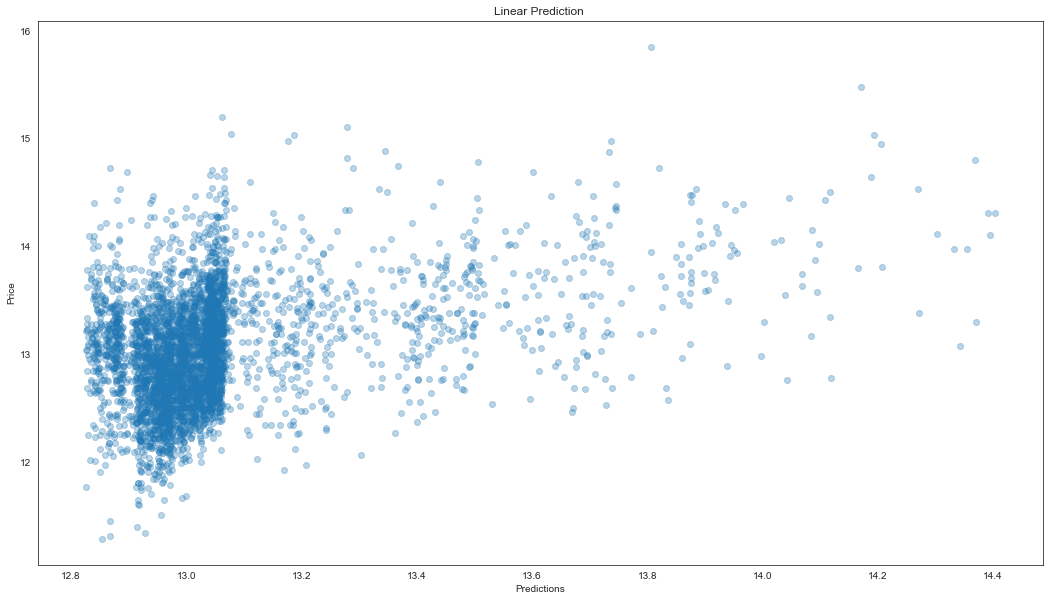

KfoldCrossVal mean score using Linear regression is 0.1472371791758254
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     9110.
Date:                Sat, 26 Sep 2020   Prob (F-statistic):               0.00
Time:                        18:47:25   Log-Likelihood:                -56582.
No. Observations:               17276   AIC:                         1.132e+05
Df Residuals:                   17270   BIC:                         1.132e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

In [41]:
linear_regression(X_3,y_3)

# **<center> Cross Validation </center> <a id=CrossValidation></a>**
Cross Validation is a technique which involves reserving a particular sample of a dataset on which we do not train the model. Later, we will test our model on this sample before finalizing it.

We will be performing K-Fold Cross Validation.Below are the steps for it:

1. Randomly split your entire dataset into k”folds”
2. For each k-fold in your dataset, build your model on k – 1 folds of the dataset. Then, test the model to check the effectiveness for kth fold
3. Record the error you see on each of the predictions
4. Repeat this until each of the k-folds has served as the test set
5. The average of your k recorded errors is called the cross-validation error and will serve as your performance metric for the model

In [42]:
#Linear Model 1:-
print('Linear Model 1')
cross_val(X_1,y_1)

Linear Model 1
KfoldCrossVal mean score using Linear regression is 0.7675559710758909


In [43]:
#Linear Model 2:-
print('Linear Model 2')
cross_val(X_2,y_2)

Linear Model 2
KfoldCrossVal mean score using Linear regression is 0.5690031570647223


In [44]:
#Linear Model 3:-
print('Linear Model 3')
cross_val(X_3,y_3)

Linear Model 3
KfoldCrossVal mean score using Linear regression is 0.13916215642942417


#

# **<center> Stepwise Regression </center> <a id=StepwiseRegression></a>**

Stepwise regression is a method of fitting regression models in which the choice of predictive variables is carried out by an automatic procedure. (p-value in our case).

BACKWARD STEPWISE REGRESSION is a stepwise regression approach, that begins with a full model and at each step gradually eliminates variables from the regression model to find a reduced model that best explains the data. Also known as Backward Elimination regression.

FORWARD STEPWISE REGRESSION is a type of stepwise regression which begins with an empty model and adds in variables one by one. ... It is one of two commonly used methods of stepwise regression; the other is backward elimination, and is almost opposite.

Here we are performing Forward Feature Selection. And from the results we can see that the best features selected are
1. sqft_living
2. grade
3. sqft_living15
4. bathrooms
5. view
6. lat
7. waterfront
8. floors
9. built_age
10. condition

In [46]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

clf = LinearRegression()

# Build step forward feature selection
sfs1 = sfs(clf,k_features = 10,forward=True,floating=False, scoring='r2',cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X_1, y_1)
sfs1.subsets_

{1: {'feature_idx': (1,),
  'cv_scores': array([0.48187235, 0.48860879, 0.47461582, 0.49999791, 0.5230596 ]),
  'avg_score': 0.4936308950418463,
  'feature_names': ('grade',)},
 2: {'feature_idx': (1, 8),
  'cv_scores': array([0.62671851, 0.63101335, 0.62154572, 0.63879115, 0.64042765]),
  'avg_score': 0.6316992747584437,
  'feature_names': ('grade', 'lat')},
 3: {'feature_idx': (0, 1, 8),
  'cv_scores': array([0.69827642, 0.69453714, 0.68598847, 0.70132247, 0.73349246]),
  'avg_score': 0.7027233898596255,
  'feature_names': ('sqft_living', 'grade', 'lat')},
 4: {'feature_idx': (0, 1, 8, 14),
  'cv_scores': array([0.73037692, 0.72626531, 0.72052781, 0.73132838, 0.74029272]),
  'avg_score': 0.7297582280072449,
  'feature_names': ('sqft_living', 'grade', 'lat', 'built_age')},
 5: {'feature_idx': (0, 1, 5, 8, 14),
  'cv_scores': array([0.74549139, 0.74047431, 0.73076686, 0.74708881, 0.75091971]),
  'avg_score': 0.7429482138518343,
  'feature_names': ('sqft_living', 'grade', 'view', 'lat',

In [47]:
clf = LinearRegression()

# Build step forward feature selection
sfs1 = sfs(clf,k_features = 5,forward=True,floating=False, scoring='r2',cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X_2, y_2)
sfs1.subsets_

{1: {'feature_idx': (1,),
  'cv_scores': array([0.48187235, 0.48860879, 0.47461582, 0.49999791, 0.5230596 ]),
  'avg_score': 0.4936308950418463,
  'feature_names': ('grade',)},
 2: {'feature_idx': (0, 1),
  'cv_scores': array([0.5470872 , 0.5458325 , 0.53022467, 0.55432   , 0.5926463 ]),
  'avg_score': 0.5540221357533726,
  'feature_names': ('sqft_living', 'grade')},
 3: {'feature_idx': (0, 1, 2),
  'cv_scores': array([0.55629594, 0.54953735, 0.53918981, 0.56286997, 0.60764991]),
  'avg_score': 0.5631085971203167,
  'feature_names': ('sqft_living', 'grade', 'sqft_above')},
 4: {'feature_idx': (0, 1, 2, 3),
  'cv_scores': array([0.56354468, 0.55741379, 0.54625144, 0.57124353, 0.59829695]),
  'avg_score': 0.5673500774980036,
  'feature_names': ('sqft_living', 'grade', 'sqft_above', 'sqft_living15')},
 5: {'feature_idx': (0, 1, 2, 3, 4),
  'cv_scores': array([0.56331715, 0.55766175, 0.54629538, 0.57134048, 0.59832304]),
  'avg_score': 0.567387562269033,
  'feature_names': ('sqft_living',


In [48]:
clf = LinearRegression()

# Build step forward feature selection
sfs1 = sfs(clf,k_features = 5,forward=True,floating=False, scoring='r2',cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X_3, y_3)
sfs1.subsets_

{1: {'feature_idx': (0,),
  'cv_scores': array([0.12589365, 0.12488338, 0.10838688, 0.13504498, 0.07912932]),
  'avg_score': 0.11466764211299044,
  'feature_names': ('view',)},
 2: {'feature_idx': (0, 5),
  'cv_scores': array([0.1293913 , 0.13228219, 0.10983393, 0.14251075, 0.10942725]),
  'avg_score': 0.12468908616665353,
  'feature_names': ('view', 'built_age')},
 3: {'feature_idx': (0, 2, 5),
  'cv_scores': array([0.14094023, 0.14136934, 0.12445482, 0.15179849, 0.11993015]),
  'avg_score': 0.13569860561639507,
  'feature_names': ('view', 'yr_renovated', 'built_age')},
 4: {'feature_idx': (0, 2, 3, 5),
  'cv_scores': array([0.14472291, 0.14924922, 0.12906307, 0.15609166, 0.11900327]),
  'avg_score': 0.1396260253378382,
  'feature_names': ('view', 'yr_renovated', 'sqft_lot', 'built_age')},
 5: {'feature_idx': (0, 1, 2, 3, 5),
  'cv_scores': array([0.14718433, 0.15113437, 0.13047566, 0.15524655, 0.11893342]),
  'avg_score': 0.14059486655656545,
  'feature_names': ('view',
   'waterfron

# **<center> Interaction Effect </center> <a id=InteractionEffect></a>**

Interaction effects occur when the effect of one variable depends on the value of another variable. Interaction effects are common in regression analysis. In any study, many variables can affect the outcome. Changing these variables can affect the outcome directly. In more complex study areas, the independent variables might interact with each other. Interaction effects indicate that a third variable influences the relationship between an independent and dependent variable. This type of effect makes the model more complex, but if the real world behaves this way, it is critical to incorporate it in your model. 

Here we are taking 3 independant variables and seeing their individual standard error, t score and P values, and these values in presence of each other. The 3 independent variables are sqft_living, grade and sqft_above


### All Columns

In [49]:
def evaluateModel (model):
    print("RSS = ", ((df.price - model.predict())**2).sum())
    print("R2 = ", model.rsquared)
modelAll = smf.ols('price ~ sqft_living + grade + sqft_above', df).fit()
print(modelAll.summary().tables[1])
evaluateModel (modelAll)

                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      11.0805      0.019    583.625      0.000      11.043      11.118
sqft_living     0.0003   5.64e-06     53.516      0.000       0.000       0.000
grade           0.2055      0.003     63.267      0.000       0.199       0.212
sqft_above     -0.0001   6.18e-06    -21.200      0.000      -0.000      -0.000
RSS =  2608.588349161524
R2 =  0.5643351646077515


### sqft_living

In [50]:
model_sqft_living = smf.ols('price ~ sqft_living', df).fit()
print(model_sqft_living.summary().tables[1])
evaluateModel (model_sqft_living)

                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      12.2187      0.006   1915.377      0.000      12.206      12.231
sqft_living     0.0004   2.81e-06    142.125      0.000       0.000       0.000
RSS =  3093.701020487909
R2 =  0.48331566140862225


### grade

In [51]:
model_grade = smf.ols('price ~ grade', df).fit()
print(model_grade.summary().tables[1])
evaluateModel (model_grade)

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.6294      0.017    632.296      0.000      10.596      10.662
grade          0.3159      0.002    145.563      0.000       0.312       0.320
RSS =  3022.180578789354
R2 =  0.4952604136228983


### sqft_above

In [52]:
model_sqft_above = smf.ols('price ~ sqft_above', df).fit()
print(model_sqft_above.summary().tables[1])
evaluateModel (model_sqft_above)

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3637      0.007   1814.189      0.000      12.350      12.377
sqft_above     0.0004   3.46e-06    110.678      0.000       0.000       0.000
RSS =  3820.401515050543
R2 =  0.36194815953932225


### sqft_living & grade

In [53]:
model_sqft_living_grade = smf.ols('price ~ sqft_living + grade + sqft_living*grade', df).fit()
print(model_sqft_living_grade.summary().tables[1])
evaluateModel (model_sqft_living_grade)


                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            11.0313      0.033    337.975      0.000      10.967      11.095
sqft_living           0.0003   1.34e-05     21.147      0.000       0.000       0.000
grade                 0.2030      0.005     44.953      0.000       0.194       0.212
sqft_living:grade -7.669e-06   1.47e-06     -5.204      0.000   -1.06e-05   -4.78e-06
RSS =  2659.551502104384
R2 =  0.5558237206135093


### sqft_living & sqft_above

In [54]:
model_sqft_living_sqft_above = smf.ols('price ~ sqft_living + sqft_above + sqft_living*sqft_above', df).fit()
print(model_sqft_living_sqft_above.summary().tables[1])
evaluateModel (model_sqft_living_sqft_above)

                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 12.1319      0.011   1057.482      0.000      12.109      12.154
sqft_living                0.0005   7.01e-06     64.536      0.000       0.000       0.000
sqft_above              2.703e-05   8.21e-06      3.291      0.001    1.09e-05    4.31e-05
sqft_living:sqft_above -1.673e-08   1.77e-09     -9.466      0.000   -2.02e-08   -1.33e-08
RSS =  3079.3936440411853
R2 =  0.4857051610038958


### grade & sqft_above

In [55]:
model_grade_sqft_above = smf.ols('price ~ grade + sqft_above + grade*sqft_above', df).fit()
print(model_grade_sqft_above.summary().tables[1])
evaluateModel (model_grade_sqft_above)

                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           10.8886      0.035    310.205      0.000      10.820      10.957
grade                0.2581      0.005     53.735      0.000       0.249       0.268
sqft_above        9.105e-05   1.67e-05      5.436      0.000    5.82e-05       0.000
grade:sqft_above  1.403e-06   1.85e-06      0.760      0.447   -2.22e-06    5.02e-06
RSS =  2954.507262399187
R2 =  0.5065626508099371


### sqft_living, grade & sqft_above

In [56]:
model_sqft_living_grade_sqft_above = smf.ols('price ~ sqft_living+ grade + sqft_above + sqft_living*grade*sqft_above', df).fit()
print(model_sqft_living_grade_sqft_above.summary().tables[1])
evaluateModel (model_sqft_living_grade_sqft_above)

                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       11.2214      0.053    210.503      0.000      11.117      11.326
sqft_living                      0.0003   3.59e-05      8.351      0.000       0.000       0.000
grade                            0.1903      0.008     24.894      0.000       0.175       0.205
sqft_above                      -0.0003   4.31e-05     -7.267      0.000      -0.000      -0.000
sqft_living:grade            -5.161e-07   4.27e-06     -0.121      0.904   -8.89e-06    7.86e-06
sqft_living:sqft_above        4.577e-08   1.08e-08      4.236      0.000    2.46e-08    6.69e-08
grade:sqft_above              1.985e-05   4.85e-06      4.094      0.000    1.03e-05    2.94e-05
sqft_living:grade:sqft_above -4.594e-09   9.07e-10     -5.066      0.000   -6.37e-09   -2.82e-09
RSS =  2603.0273220345025
R2 =

# **<center> Regularization </center> <a id=Regularization></a>**#

Regularization is a very important technique in machine learning to prevent overfitting. Mathematically speaking, it adds a regularization term in order to prevent the coefficients to fit so perfectly to overfit. The difference between the L1 and L2 is just that L2 is the sum of the square of the weights, while L1 is just the sum of the weights

Is there collinearity among some features? L2 regularization can improve prediction quality in this case, as implied by its alternative name, "ridge regression." However, it is true in general that either form of regularization will improve out-of-sample prediction, whether or not there is multicollinearity and whether or not there are irrelevant features, simply because of the shrinkage properties of the regularized estimators. L1 regularization can't help with multicollinearity it will just pick the feature with the largest correlation to the outcome (which isn't useful if you have an interest in estimating coefficients for all features which are strongly correlated with your target). Ridge regression can obtain coefficient estimates even when you have more features than examples... but the probability that any will be estimated precisely at 0 is 0.

In [57]:
y = df['price'] 
X = df.drop('price', axis = 1) 

In [58]:
# Ridge(L2) Regression:
def RidgeRegr(X_train,y_train):
# List to maintain the different cross-validation scores 
  cross_val_scores_ridge = [] 
    
  # List to maintain the different values of alpha 
  alpha = [] 
    
  # Loop to compute the different values of cross-validation scores 
  for i in range(1, 9): 
      ridgeModel = Ridge(alpha = i * 0.25) 
      ridgeModel.fit(X_train, y_train) 
      scores = cross_val_score(ridgeModel, X, y, cv = 10) 
      avg_cross_val_score = mean(scores)*100
      cross_val_scores_ridge.append(avg_cross_val_score) 
      alpha.append(i * 0.25) 
    
  # Loop to print the different values of cross-validation scores 
  for i in range(0, len(alpha)): 
      print(str(alpha[i])+' : '+str(cross_val_scores_ridge[i])) 

In [59]:
X_1, X_test, y_1, y_test = train_test_split(X_1, y_1, test_size = 0.25) 
RidgeRegr(X_1,y_1)

0.25 : 76.63935997436828
0.5 : 76.639265399088
0.75 : 76.63915344085778
1.0 : 76.6390242060756
1.25 : 76.63887780035364
1.5 : 76.6387143285282
1.75 : 76.63853389466549
2.0 : 76.63833660207105


From the above output, we can conclude that the best value of alpha for the data is 0.25



In [60]:

# Building and fitting the Ridge Regression model 
ridgeModelChosen = Ridge(alpha = 0.25) 
ridgeModelChosen.fit(X_1, y_1) 
  
# Evaluating the Ridge Regression model 

#Linear Model 1(Ridge):-
print('Linear Model 1(Ridge)')
cross_val(X_test,y_test)

Linear Model 1(Ridge)
KfoldCrossVal mean score using Linear regression is 0.7646453998612641


In [61]:
X_2, X_test, y_2, y_test = train_test_split(X_2, y_2, test_size = 0.25) 
RidgeRegr(X_2,y_2)

0.25 : 76.63935997436828
0.5 : 76.639265399088
0.75 : 76.63915344085778
1.0 : 76.6390242060756
1.25 : 76.63887780035364
1.5 : 76.6387143285282
1.75 : 76.63853389466549
2.0 : 76.63833660207105


From the above output, we can conclude that the best value of alpha for the data is 0.25

In [62]:
# Building and fitting the Ridge Regression model 
ridgeModelChosen = Ridge(alpha = 0.25) 
ridgeModelChosen.fit(X_2, y_2) 
  
# Evaluating the Ridge Regression model 

#Linear Model 2(Ridge):-
print('Linear Model 2(Ridge)')
cross_val(X_test,y_test)

Linear Model 2(Ridge)
KfoldCrossVal mean score using Linear regression is 0.5647521319661111


In [63]:
X_3, X_test, y_3, y_test = train_test_split(X_3, y_3, test_size = 0.25) 
RidgeRegr(X_3,y_3)

0.25 : 76.63935997436828
0.5 : 76.639265399088
0.75 : 76.63915344085778
1.0 : 76.6390242060756
1.25 : 76.63887780035364
1.5 : 76.6387143285282
1.75 : 76.63853389466549
2.0 : 76.63833660207105


From the above output, we can conclude that the best value of alpha for the data is 0.25

In [64]:
# Building and fitting the Ridge Regression model 
ridgeModelChosen = Ridge(alpha = 0.25) 
ridgeModelChosen.fit(X_3, y_3) 
  
# Evaluating the Ridge Regression model 

#Linear Model 3(Ridge):-
print('Linear Model 3(Ridge)')
cross_val(X_test,y_test)

Linear Model 3(Ridge)
KfoldCrossVal mean score using Linear regression is 0.13192359349134136


# **<center> Conclusion </center> <a id=Conclusion></a>**

# Questions & Answers


Answer the following questions for all of the models:

#### 1. **Is the relationship significant?**

**Model 1:** Yes, concluding from the R-Sq score & p-values we can say relationship is significant


**Model 2:** Yes, concluding from the R-Sq score & p-values we can say relationship is significant except for bathrooms & sqft_living15

**Model 3:** Yes, concluding from the R-Sq score & p-values we can say relationship is significant

#### 2. **Are any model assumptions violated?**

Assumptions for Linear Regression are as follow:-

1. Linear relationship.
2. Multivariate normality.(correlated variables do clustering around mean value)
3. No or little multicollinearity.
4. No auto-correlation.
5. Homoscedasticity.(all random variables in the sequence have the same finite variance)

**Model 1:** We can conclude from the plot that it has a linear relationship and multivariate normality. However it has High Multicollinearity & Homoscedasticity. No Auto-correlation.

**Model 2:** We can conclude that it has slight linear relationship & multivariate normality. No Auto-correlation. However this too has high Multicollinearity & Homoscedasticity.

**Model 3:** We can conclude that it doesn't have a linear relationship but has multivariate normality. No Auto-correlation. But this  has low Multicollinearity & Homoscedasticity.

#### 3. **Is there any multicollinearity in the model?**

**Model 1:** Yes, High multicollinearity

**Model 2:** Yes, High multicollinearity

**Model 3:** No, very low multicollinearity

#### 4. **In the multivariate models are predictor variables independent of all the other predictor variables?**

**Model 1:** No, there are quite a few of them which have correlation.

**Model 2:** No, there is some correlation between them 

**Model 3:** No, there is correlation between 2 variables, sqft_Lot & sqft_lot15.


#### 5. **In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.**

**Model 1:** All except for sqft_lot15

**Model 2:** sqft_living, grade & sqft_above

**Model 3:** All except waterfront


#### 6. **Does the model make sense?**

**Model 1:** Yes, considering it is a dataset for price prediction, all the variables seem that they could influence the price. So it makes sense to try and include them all for prediction.

**Model 2:** Yes, considering it is a dataset for price prediction, all the variables have high correlation with price. So it makes sense to try and include them all for prediction.

**Model 3:** Not much, because they don't have particularly high correlation with price. It was just an attempt at seeing whether vaariables with low VIF can create a good model. In this case, it does not.

#### 7. **Does regularization help?**

**Model 1:** 

Score without regularization is 0.7716998042369886

Score with regularization is
0.7813909429051513

So yes, it helps slightly.

**Model 2:** 

Score without regularization is 0.5761003671219611

Score with regularization is
0.5624588957453873

So no, it hinders slightly.

**Model 3:** 

Score without regularization is 0.14330150401513309

Score with regularization is 0.13587781730876883

So no, it hinders slightly.

#### 8. **Which independent variables are significant?**

**Model 1:** 

1.   sqft_living
2.   grade
3.   sqft_living15
4.   bathrooms
5.   view
6.   lat
7.   waterfront
8.   floors
9.   built_age
10.  condition

**Model 2:** 
1.   sqft_living
2.   grade
3.   sqft_above
4.   sqft_living15
5.   bathrooms

**Model 3:**
1.   view
2.   waterfront
3.   yr_renovated
4.   sqft_lot
5.   built_age

#### 9. **Which hyperparameters are important?**

**Model 1,2,3:** We can see that for all 3 models, we're optimizing the value of Lamda. This is an important hyperparameter which helps us create a good model.

# **<center> Contribution </center> <a id=Contribution></a>**

As this was a learning assignment, the majority of the code has been taken from my personal GitHub account with similar project.

* Code by self : 60%

* Code from external Sources : 40%

# **<center> Citation </center> <a id=Citation></a>**

1.   https://github.com/RushabhNisher/Data/tree/master/Data%20Science/Linear_and_Logistic_Regression  - Personal Github Repository
2.   https://colab.research.google.com/drive/1hwY1.gRkeg4P4SwPkMHyFr0TxISxEbePA1?usp=2haring - Class Module (Linear Regression)
3.   https://colab.research.google.com/drive/1OHmKXEsqr3cyuH9FWq-udDYczARSPflB?us - Class Module (Regularization)
4.   https://www.kaggle.com/abhisheknelgundh/kc-housesales-data-linearregression-randomforest - Kaggle Repository on same dataset
5.   https://www.kaggle.com/lkpatel/an-amateur-approach-for-kc-house-price-prediction - Kaggle Repository on same dataset
6.   https://www.kaggle.com/shuklajt/kc-house-data-analysis-and-predictions - Kaggle Repository on same dataset
7.   https://www.kaggle.com/nkrishnanl/kc-housing-price-prediction - Kaggle Repository on same dataset
8.   https://www.geeksforgeeks.org/ml-implementing-l1-and-l2-regularization-using-sklearn/ - GeeksForGeeks Implementation of Regularization

# **<center> License </center> <a id=License></a>**

Copyright (c) 2020 Rushabh Nisher

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.